In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
file_name= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df=pd.read_csv(file_name)
df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [104]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
x=df[['highway-mpg']]
y=df[['price']]
lm.fit(x,y)
yhat=lm.predict(x)


In [53]:
lm.intercept_

array([38423.30585816])

In [54]:
lm.coef_

array([[-821.73337832]])

In [41]:
#similarly for the multiple linear regression


In [46]:
lm1=LinearRegression()
z=df[['horsepower','curb-weight','engine-size','highway-mpg']]
lm1.fit(z,df['price'])

LinearRegression()

In [47]:
lm1.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [48]:
lm1.intercept_

-15806.624626329227

In [56]:
## the below is model evalutaion using visualization


(0.0, 48166.53963532074)

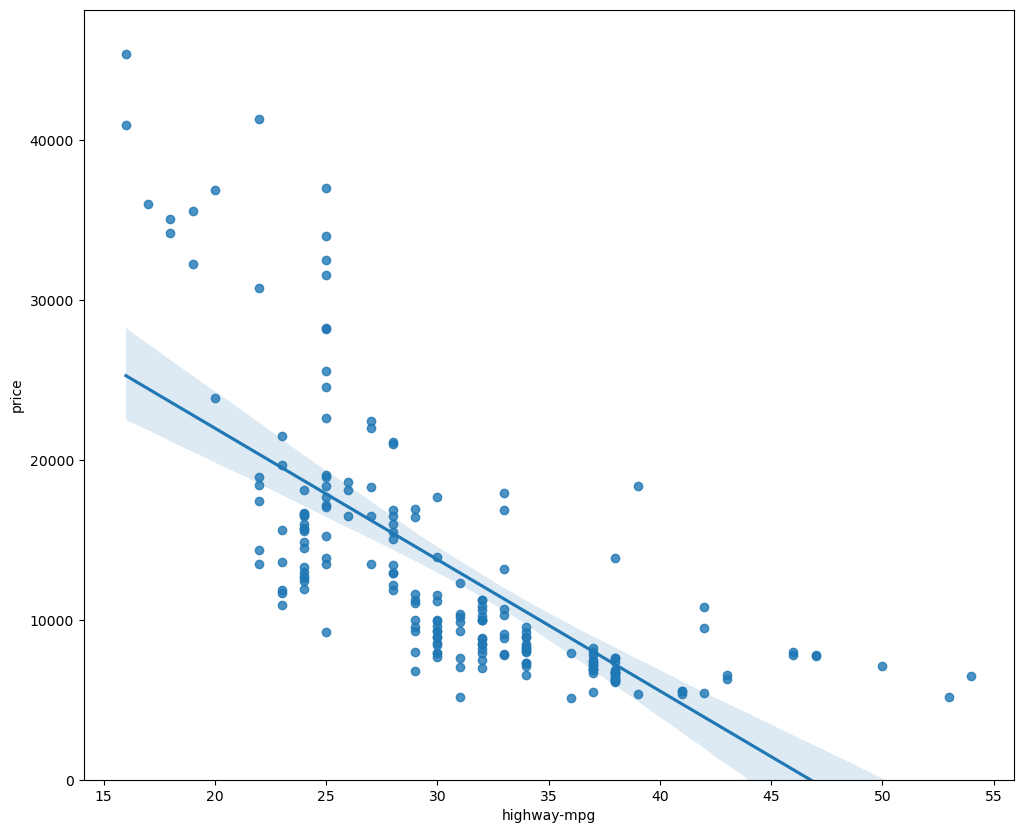

In [63]:
import seaborn as sns
%matplotlib inline
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

(0.0, 47414.1)

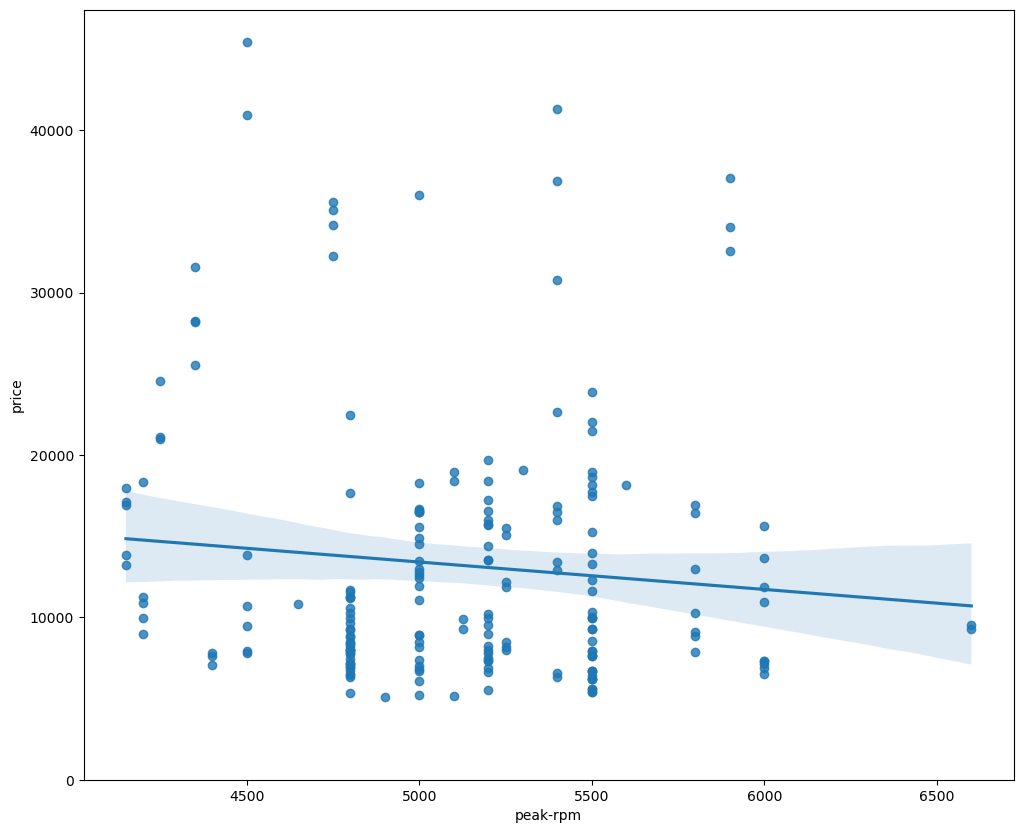

In [64]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [65]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


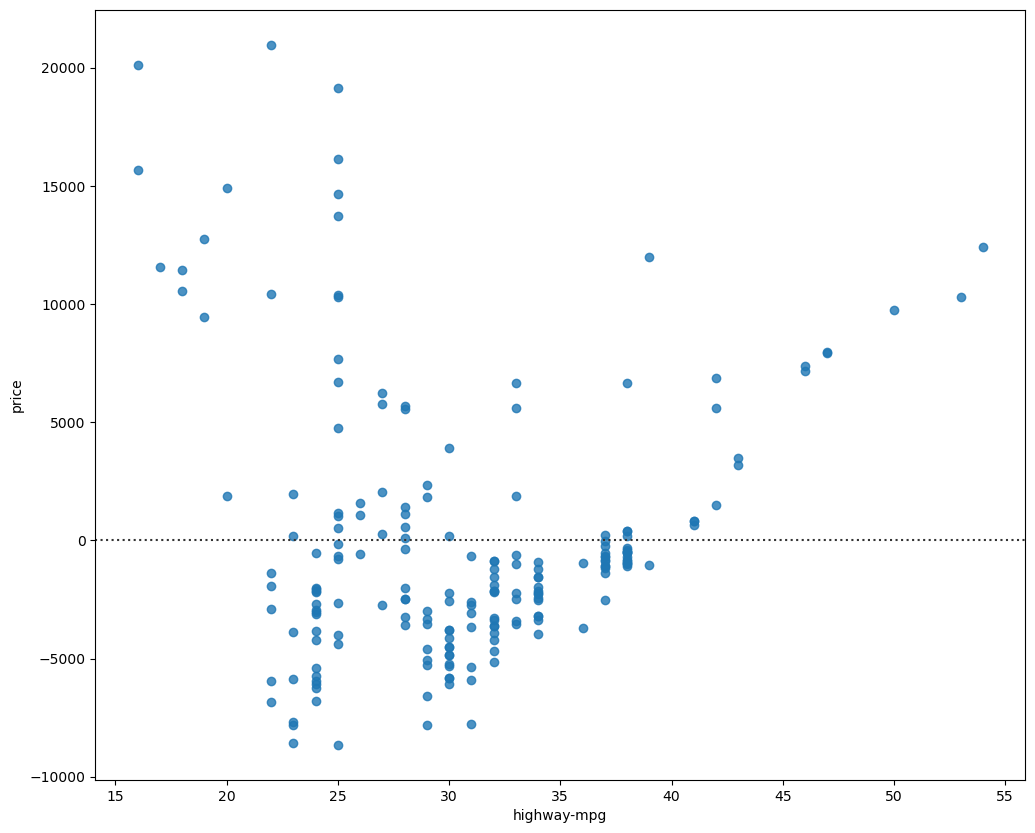

In [66]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

/var/folders/kt/xg8sw3qj0030bwvtfq7ld3f40000gn/T/ipykernel_4105/1120967209.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/kt/xg8sw3qj0030bwvtfq7ld3f40000gn/T/ipykernel_4105/1120967209.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please a

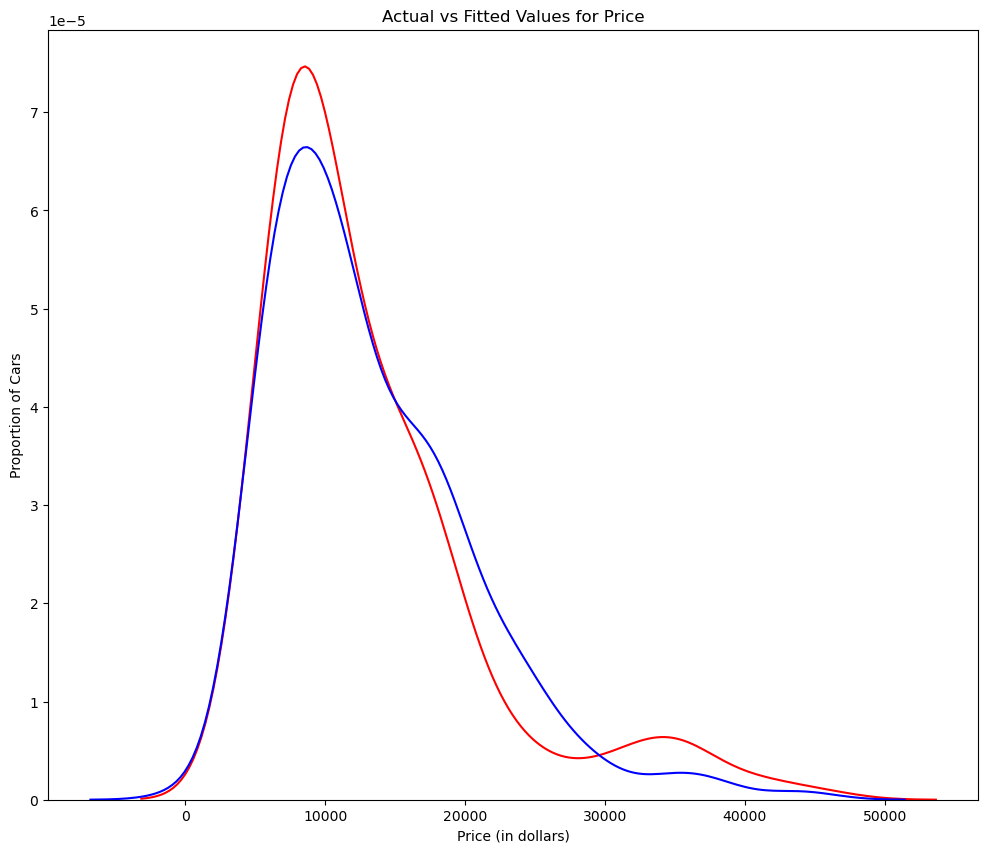

In [71]:
z=df[['horsepower','curb-weight','engine-size','highway-mpg']]
Y_hat = lm1.predict(z)
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


In [72]:
# polynomial regression and pipelines

In [73]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [74]:
x = df['highway-mpg']
y = df['price']

In [75]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


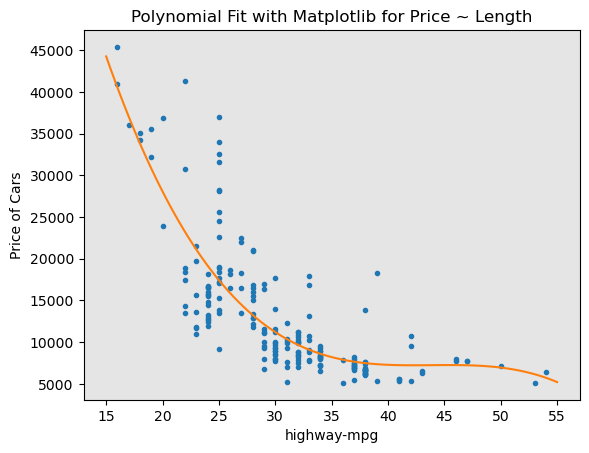

In [76]:
PlotPolly(p, x, y, 'highway-mpg')

In [77]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


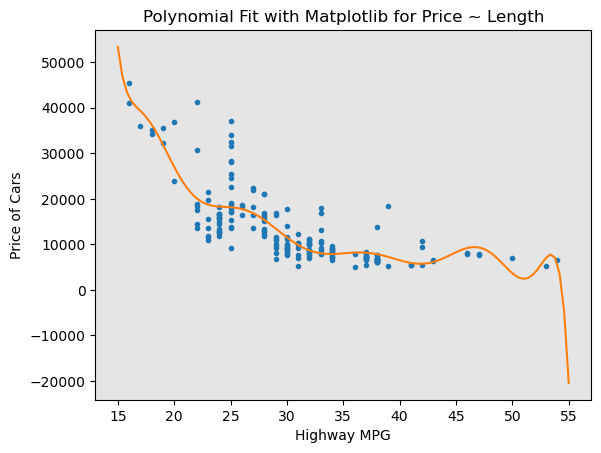

In [83]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [84]:
#pipelines

In [87]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
z=z.astype(float)
pipe.fit(z,y)
ypipe=pipe.predict(z)
ypipe[0:4]


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [88]:
#measures for in-sample evaluation

In [97]:
#highway_mpg_fit
lm.fit(x, y)
# Find the R^2
print('The R-square is: ', lm.score(x, y))

ValueError: Expected 2D array, got 1D array instead:
array=[27 27 26 30 22 25 25 25 20 29 29 28 28 25 22 22 20 53 43 43 41 38 30 38
 38 38 30 30 24 54 38 42 34 34 34 34 33 33 33 33 28 31 29 29 19 19 17 31
 38 38 38 38 23 23 23 23 32 32 32 32 42 32 27 39 25 25 25 25 18 18 16 16
 24 41 38 38 30 30 32 24 24 24 32 32 30 30 37 50 37 37 37 37 37 37 37 37
 34 34 22 22 25 25 23 25 24 33 24 25 24 33 24 25 24 33 24 41 30 38 38 38
 30 24 27 25 25 25 31 31 28 28 28 28 26 26 36 31 31 37 33 32 25 29 32 31
 29 23 39 38 38 37 32 32 37 37 36 47 47 34 34 34 34 29 29 30 30 30 30 30
 30 34 33 32 32 32 24 24 24 24 46 34 46 34 34 42 32 29 29 24 38 31 28 28
 28 28 22 22 28 25 23 27 25].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [100]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df['price'],yhat)
print('the mean square error of price and predicted value is:',mse)

the mean square error of price and predicted value is: 31635042.944639895


In [102]:
lm1.fit(z,df['price'])
lm1.score(z,df['price'])

0.8093562806577457